In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
data = pd.read_csv('agricultural sustainability.csv')
data.head()

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
0,0.374540,6778.284815,964.057410,126.020778,226.809659,0
1,0.950714,1757.259685,4561.488080,175.365653,88.134761,0
2,0.731994,2454.658427,2773.635676,129.654718,194.072090,0
3,0.598658,9086.987697,4219.058597,89.916140,201.678762,0
4,0.156019,6457.861537,1940.223205,104.286142,156.032668,0


In [7]:
X = data[['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint', 'fertilizer_use']]
y = data['sustainability']

In [9]:
y.value_counts()

sustainability
0    180
1     20
Name: count, dtype: int64

In [61]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority') 
X,y=smote.fit_resample(X,y)
y.value_counts()

sustainability
0    180
1    180
Name: count, dtype: int64

In [63]:
data.shape

(200, 6)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0], dtype=int64)

In [50]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


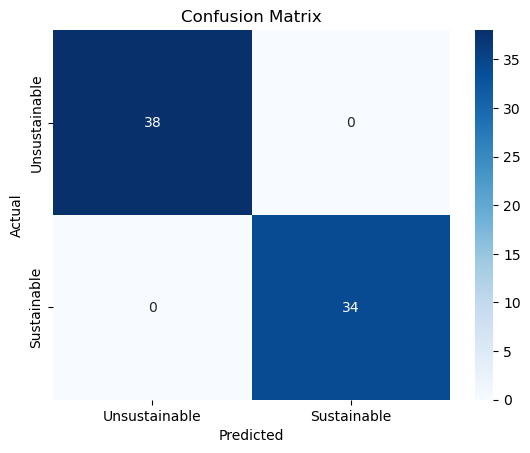

In [52]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Unsustainable', 'Sustainable'], 
            yticklabels=['Unsustainable', 'Sustainable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=['Unsustainable', 'Sustainable']))

               precision    recall  f1-score   support

Unsustainable       1.00      1.00      1.00        38
  Sustainable       1.00      1.00      1.00        34

     accuracy                           1.00        72
    macro avg       1.00      1.00      1.00        72
 weighted avg       1.00      1.00      1.00        72



In [56]:
import joblib
# Save the model to a file
joblib.dump(model, 'agricultural_sustainability_model.pkl')

['agricultural_sustainability_model.pkl']